Adaline
===========================
Objetivos:
* Conhecer o neurônio artificial tipo Adaline;
* Implementar o Adaline no Python;
* Utilizar o Adaline para aproximar uma reta (sem e com ruído nos dados de
treinamento).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

## Declaração de funções


In [2]:
#implementação do Adaline
def yadaline(w,b,x):
    y = np.dot(w,x) + b                                                           #implementa a multiplicação de todos os valores de w e x
    return y


In [3]:
def treina_adaline(W, b, X, yd, alfa, max_epoch = 1000, error_tolerance = 0.0001):
    '''
    Treina o Adaline.
    Entradas: W,b,X,yd,alfa,max_epoch,error_tolerance
    Retorno: W,b,vec_SEQ
    '''
    n = np.size(X)                                                              #numero de amostras de X
    SEQ = error_tolerance                                                         #SEQ = somatório dos erros quadraticos
    epoch = 1                                                                     #começa na época 1
    vec_SEQ = []

    while(epoch <= max_epoch and SEQ >= error_tolerance):
      SEQ = 0                                                                     #inicializa SEQ da época
      for i in range(n):                                                          #para cada amostra de X
        y_i = yadaline(W, b, X[i])                                            #determinar a saida do neuronio para a amostra i
        error_i = yd[i] - y_i                                                     #determinar o erro
        W = W + alfa * error_i * X[i].T                                         #atualiza o vetor de pesos
        b = b + alfa * error_i                                                     #atualiza o bias
        SEQ = SEQ + error_i ** 2                                                   #acumula o SEQ
      vec_SEQ.append(SEQ.item())                                                   #salva SEQ da epoca  - Essa alteração (.item()) garante que o valor de SEQ seja adicionado à lista como um escalar, eliminando as dimensões extras.
      epoch = epoch + 1

    return (W, b, vec_SEQ)


In [4]:
def plot_SEQ(vec_SEQ):
    plt.figure()
    plt.plot(range(1, len(vec_SEQ) + 1), vec_SEQ, marker='.')
    plt.title('Soma dos Erros Quadráticos (SEQ) por Época')
    plt.xlabel('Épocas')
    plt.ylabel('SEQ')
    plt.grid(True)
    plt.show()


In [6]:
def mistura(X, yd):
    '''
    Mistura os dados da matriz X e tambem a classificacao correspondentemente de cada amostra no vetor yd.

    Entradas: X,yd
    Retorno: xp,yp

    Onde:
    X = matriz (2 x N) com as amostras (por coluna) de todas as classes
    yd = vetor linha (1 x N) com a classificação numérica dos dados
    xp = matriz (2 x N) com as amostras (por coluna) de todas as classes misturadas
    yp = vetor linha (1 x N) com a classificação numérica dos dados misturada
    N = número total de amostras (soma de todas as classes)

    '''
    X = X.T                   #transpoe a matriz para voltar ao formato amostra por linha antes do embaralhamento
    xp, yp = shuffle(X, yd)
    xp = xp.T                 #transpoe a matriz para manter o formato de amostra por coluna

    return (xp, yp)

## Geração dos dados

In [7]:
#gera dados de X e y
qtd_amostras = 50
qtd_atributos = 1

#X = np.linspace(0,99,5)
X = np.linspace(1,10,qtd_amostras)
yd = 3*X + 2

print('X = ', X)
print('yd = ', yd)

X =  [ 1.          1.18367347  1.36734694  1.55102041  1.73469388  1.91836735
  2.10204082  2.28571429  2.46938776  2.65306122  2.83673469  3.02040816
  3.20408163  3.3877551   3.57142857  3.75510204  3.93877551  4.12244898
  4.30612245  4.48979592  4.67346939  4.85714286  5.04081633  5.2244898
  5.40816327  5.59183673  5.7755102   5.95918367  6.14285714  6.32653061
  6.51020408  6.69387755  6.87755102  7.06122449  7.24489796  7.42857143
  7.6122449   7.79591837  7.97959184  8.16326531  8.34693878  8.53061224
  8.71428571  8.89795918  9.08163265  9.26530612  9.44897959  9.63265306
  9.81632653 10.        ]
yd =  [ 5.          5.55102041  6.10204082  6.65306122  7.20408163  7.75510204
  8.30612245  8.85714286  9.40816327  9.95918367 10.51020408 11.06122449
 11.6122449  12.16326531 12.71428571 13.26530612 13.81632653 14.36734694
 14.91836735 15.46938776 16.02040816 16.57142857 17.12244898 17.67346939
 18.2244898  18.7755102  19.32653061 19.87755102 20.42857143 20.97959184
 21.53061224 22

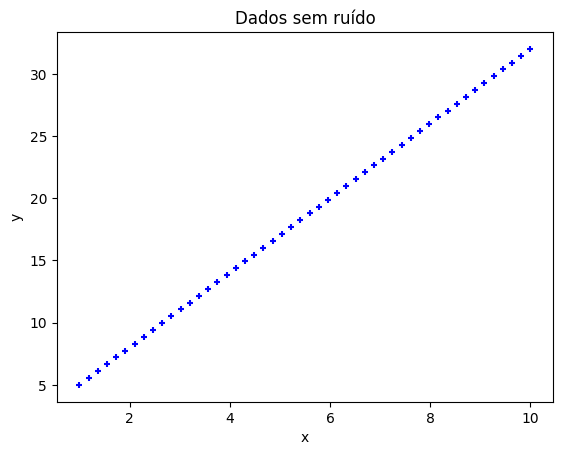

In [8]:
plt.scatter(X, yd, marker="+", c='b', s=20)
#plt.plot(X, yd, 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados sem ruído')
plt.show()

In [9]:
#misturando as posições dos dados

Xp, yp = mistura(X, yd)

print('Xp = ', Xp)
print('yp = ', yp)

Xp =  [ 7.42857143  9.08163265  4.48979592  5.7755102  10.          4.30612245
  8.16326531  9.44897959  1.91836735  7.24489796  2.83673469  5.59183673
  6.32653061  7.6122449   3.3877551   5.04081633  8.53061224  7.06122449
  2.28571429  1.36734694  7.97959184  9.63265306  4.12244898  1.73469388
  6.51020408  2.10204082  4.67346939  7.79591837  6.14285714  3.20408163
  8.71428571  4.85714286  8.34693878  3.93877551  1.          6.87755102
  1.55102041  2.65306122  5.95918367  9.26530612  6.69387755  3.75510204
  1.18367347  2.46938776  5.40816327  3.57142857  9.81632653  3.02040816
  5.2244898   8.89795918]
yp =  [24.28571429 29.24489796 15.46938776 19.32653061 32.         14.91836735
 26.48979592 30.34693878  7.75510204 23.73469388 10.51020408 18.7755102
 20.97959184 24.83673469 12.16326531 17.12244898 27.59183673 23.18367347
  8.85714286  6.10204082 25.93877551 30.89795918 14.36734694  7.20408163
 21.53061224  8.30612245 16.02040816 25.3877551  20.42857143 11.6122449
 28.14285714 16

## Treinamento com Adaline

In [10]:
#Define os parametros para o Adaline

maxepocas = 1000
tol = 1 * (10 ** -9)
alfa = 1 * (10 ** -4)

w_original = np.random.rand(1, qtd_atributos)
b_original = np.random.rand(1, 1)

w = w_original
b = b_original

In [11]:
print('w = ', w)
print('b = ', b)

w =  [[0.57971404]]
b =  [[0.09044623]]


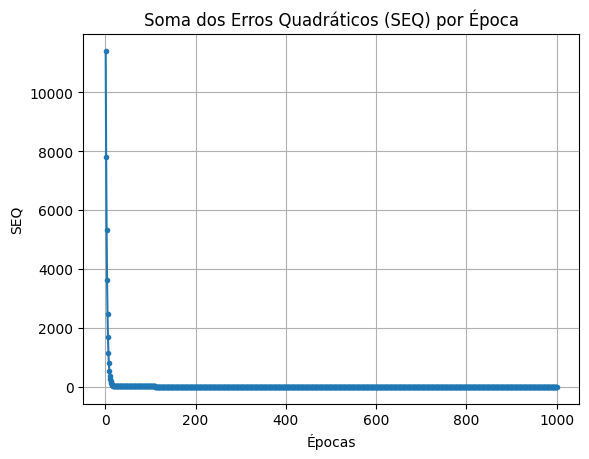

In [12]:
w, b, vec_SEQ = treina_adaline(w, b, Xp, yp, alfa, maxepocas, tol)

plot_SEQ(vec_SEQ)

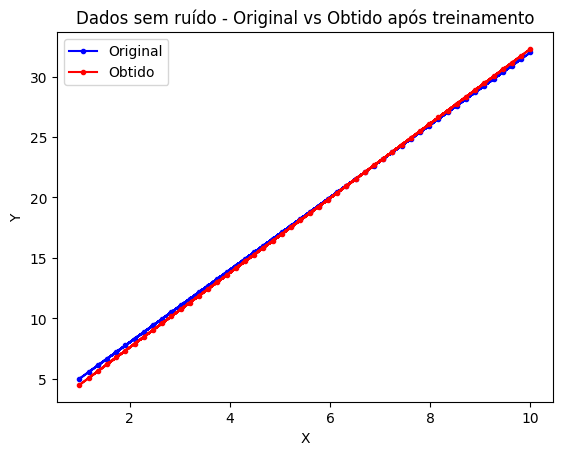

In [13]:
# Testar o ADALINE treinado com as entradas de treinamento
y = np.array([yadaline(w, b, x) for x in Xp])  # Gera um array NumPy diretamente

# Achata y para um vetor unidimensional - para poder plotar no grafico
y = y.flatten()

# Plota a reta original e a reta obtida com o Adaline
plt.figure()
plt.plot(Xp, yp, 'b.-', label='Original')
plt.plot(Xp, y, 'r.-', label='Obtido')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dados sem ruído - Original vs Obtido após treinamento')
plt.legend()
plt.show()

## Dados com ruído

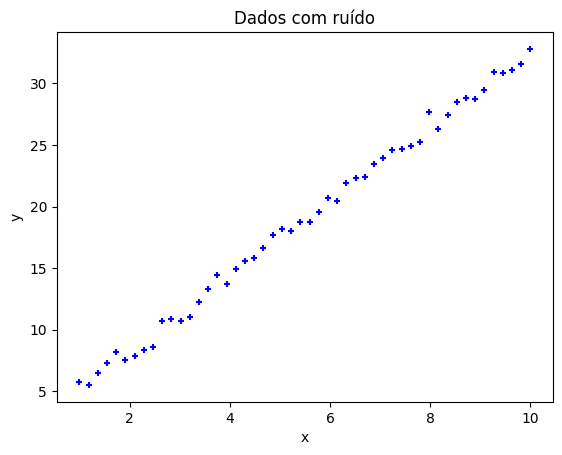

X =  [ 5.04081633  9.08163265  8.53061224  5.2244898   5.7755102   3.20408163
  9.81632653  9.63265306  6.69387755  2.28571429  1.         10.
  5.95918367  7.06122449  4.48979592  2.65306122  7.79591837  1.91836735
  3.3877551   6.51020408  5.59183673  6.32653061  9.26530612  4.85714286
  6.14285714  2.10204082  7.42857143  7.6122449   3.57142857  4.12244898
  3.75510204  3.93877551  2.83673469  8.71428571  2.46938776  3.02040816
  1.73469388  4.30612245  8.16326531  9.44897959  8.34693878  5.40816327
  8.89795918  7.97959184  6.87755102  1.36734694  1.18367347  1.55102041
  7.24489796  4.67346939]
yd =  [18.15849585 29.48517794 28.50322441 18.02429989 19.52817044 11.0176947
 31.56588132 31.12085092 22.38833189  8.34933249  5.71363035 32.80006885
 20.72299057 23.9471172  15.83288601 10.71446577 25.24343926  7.50150499
 12.24741996 22.31159833 18.7191059  21.90688001 30.93495689 17.67052784
 20.41781909  7.85358213 24.64695064 24.91359796 13.32662395 14.89313788
 14.4201015  13.6741106

In [14]:
# Parâmetros do ruído
media_ruido = 0.5    # média do ruído
desvio_padrao_ruido = 0.5   # desvio padrão do ruído

# Gerar ruído
ruido = np.random.normal(media_ruido, desvio_padrao_ruido, yd.shape)

yd_ruido = yd + ruido

plt.scatter(X, yd_ruido, marker="+", c='b', s=20)
#plt.plot(X, yd_ruido, 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados com ruído')
plt.show()

Xp_ruido, yp_ruido = mistura(X, yd_ruido)

print('X = ', Xp_ruido)
print('yd = ', yp_ruido)

w =  [[0.57971404]]
b =  [[0.09044623]]


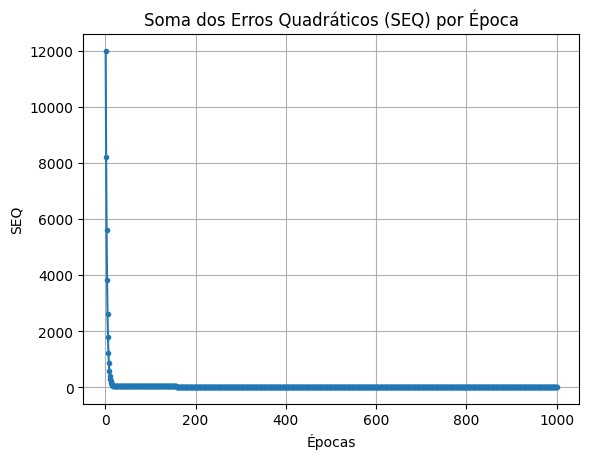

In [15]:
#Define usa o W e b gerado no inicio, treina o Adaline e plota o grafico de erro

w_r = w_original
b_r = b_original

print('w = ', w_r)
print('b = ', b_r)

w_r, b_r, vec_SEQ = treina_adaline(w_r, b_r, Xp_ruido, yp_ruido, alfa, maxepocas, tol)

plot_SEQ(vec_SEQ)

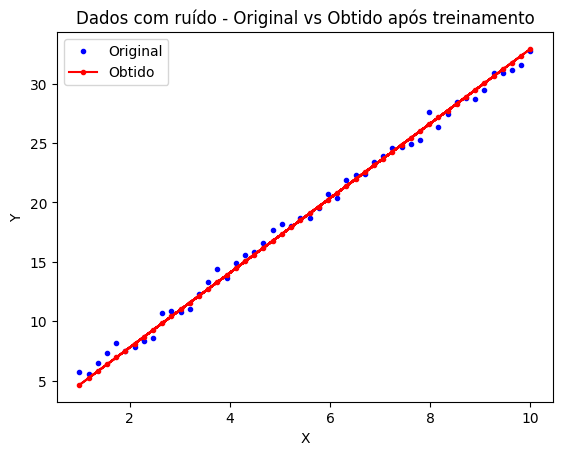

In [18]:
# Testar o ADALINE treinado com as entradas de treinamento
y = np.array([yadaline(w_r, b_r, x) for x in Xp_ruido])  # Gera um array NumPy diretamente

# Achata y para um vetor unidimensional - para poder plotar no grafico
y = y.flatten()

# Plota a reta original e a reta obtida com o Adaline
plt.figure()
plt.plot(Xp_ruido, yp_ruido, 'b.', label='Original')
plt.plot(Xp_ruido, y, 'r.-', label='Obtido')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dados com ruído - Original vs Obtido após treinamento')
plt.legend()
plt.show()
